# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [4]:
from IPython.lib.display import YouTubeVideo

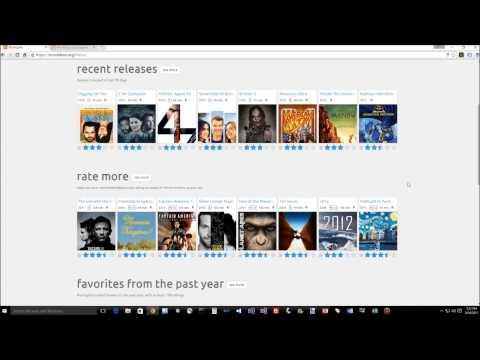

In [5]:
YouTubeVideo('4tW9HY0Q460')

**TEAM 5 Members:**

HARSH NILESH PATHAK 

JIDAPA THADAJARASSIRI

KRUSHIKA TAPEDIA

PITCHAYA WIRATCHOTISATIAN

PRINCE SHIVA CHAUDHARY


**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [6]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
df_movies = pd.read_table('data/1m/ml-1m/movies.dat',sep="::",engine='python',header=None)
df_movies.columns = ['MovieID','Title', 'Genres']

df_ratings = pd.read_table('data/1m/ml-1m/ratings.dat',sep="::",engine='python',header=None)
df_ratings.columns = ['UserID','MovieID','Rating','Timestamp']

df_users = pd.read_table('data/1m/ml-1m/users.dat',sep="::",engine='python',header=None)
df_users.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [7]:
df_users[:5]

UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

In [8]:
print(len(df_movies))
df_movies[:5]

3883


MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [9]:
df_ratings[:5]

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [12]:
# merging rating and movies data frames on leftjoin, so that I get all the movies which receied ratings has a 
# movie corresponding to it. If we do movie to rating left join: there can be movies which don't have any ratings 
# associated with it and will produce NaN values.Output of outer join  and left join will produce same results here because ratings dataframe has ratings corresponding to a movie. 
movies_ratings_df = pd.merge(df_ratings,df_movies,on = ["MovieID", "MovieID"], how = "left")
print(movies_ratings_df.shape)
movies_ratings_df[:5]

(1000209, 6)


UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres  
0                         Drama  
1  Animation|Children's|Musical  
2               Musical|Romance  
3                         Drama  
4   Animation|Children's|Comedy

In [13]:
# merging dataframe of [ratings and movies: movies_ratings_df] on users dataframe on left. This result will give us data where users
# have given rating and excluding those who never gave any rating to any movie. We can consider such userId dorment 
movies_ratings_users_df = pd.merge(movies_ratings_df, df_users, on = ["UserID", "UserID"], how = "left")
print(movies_ratings_users_df.shape)
movies_ratings_users_df[:5]

(1000209, 10)


UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres Gender  Age  Occupation Zip-code  
0                         Drama      F    1          10    48067  
1  Animation|Children's|Musical      F    1          10    48067  
2               Musical|Romance      F    1          10    48067  
3                         Drama      F    1          10    48067  
4   Animation|Children's|Comedy      F    1          10    48067

*  Data files to pandas data frames and merging: We converted these data files into pandas data frames and merged together using below steps:  
    *  Left join on rating and movies data frames so that I get all the movies which received ratings from users (If we do movie to rating left join, there can be movies which don't have any ratings  associated with it leading to produce NaN values).
    *  Left join on resultant dataframe of [ratings and movies] with users data frame. This result will give us data where users have given rating and excluding those who never gave any rating to any movie. We can consider such userId dormant.

In [14]:
# storing movies_ratings_users_df to HDF5 file
movies_ratings_users_df.to_hdf("data/1m/ml-1m/movies_ratings_users_df1.h5", key = "hdfs_key_to_store", format='table', append = True)

In [15]:
# Reading dataFrame from HDF5 file
retrievedDataFrame = pd.HDFStore('data/1m/ml-1m/movies_ratings_users_df1.h5')
print(retrievedDataFrame["hdfs_key_to_store"].shape)
data = retrievedDataFrame["hdfs_key_to_store"]
data[:5]

(1000209, 10)


UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres Gender  Age  Occupation Zip-code  
0                         Drama      F    1          10    48067  
1  Animation|Children's|Musical      F    1          10    48067  
2               Musical|Romance      F    1          10    48067  
3                         Drama      F    1          10    48067  
4   Animation|Children's|Comedy      F    1          10    48067

In [54]:
# Explode genres list
newdf = pd.DataFrame(data.Genres.str.split('|').tolist(), index=[data.UserID,data.MovieID,data.Rating,data.Title,data.Gender,data.Age,data.Occupation,data['Zip-code'],data.Timestamp]).stack()
newdf = newdf.reset_index()[[0, 'UserID','MovieID','Rating','Title','Gender','Age','Occupation','Zip-code','Timestamp']] # Genres variable is currently labeled 0
newdf.columns = ['Genres','UserID','MovieID','Rating','Title','Gender','Age','Occupation','Zip-code','Timestamp'] # renaming variables
newdf.head()

Genres  UserID  MovieID  Rating  \
0       Drama       1     1193       5   
1   Animation       1      661       3   
2  Children's       1      661       3   
3     Musical       1      661       3   
4     Musical       1      914       3   

                                    Title Gender  Age  Occupation Zip-code  \
0  One Flew Over the Cuckoo's Nest (1975)      F    1          10    48067   
1        James and the Giant Peach (1996)      F    1          10    48067   
2        James and the Giant Peach (1996)      F    1          10    48067   
3        James and the Giant Peach (1996)      F    1          10    48067   
4                     My Fair Lady (1964)      F    1          10    48067   

   Timestamp  
0  978300760  
1  978302109  
2  978302109  
3  978302109  
4  978301968

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [17]:
originalData = movies_ratings_users_df
ab= movies_ratings_users_df.groupby(["MovieID"]).mean()
print(len(ab))
ab.head()

3706


UserID    Rating     Timestamp        Age  Occupation
MovieID                                                            
1        3053.819933  4.146846  9.705586e+08  27.700530    8.067886
2        3027.977175  3.201141  9.717322e+08  27.800285    7.680456
3        2632.156904  3.016736  9.734544e+08  29.276151    7.826360
4        3268.841176  2.729412  9.716206e+08  27.788235    6.752941
5        3143.152027  3.006757  9.718301e+08  27.425676    7.506757

In [18]:
abc = ab[ab["Rating"]>4.5]
print("total number of movies with average rating more than 4.5:-> " , len(abc))
abc[["Rating"]].head()

total number of movies with average rating more than 4.5:->  21


Rating
MovieID          
50       4.517106
53       4.750000
318      4.554558
527      4.510417
745      4.520548

*  How many movies have an average rating over 4.5 among men?  How about women?

In [19]:
male_dataFrame = movies_ratings_users_df[movies_ratings_users_df["Gender"]== "M"]
print(male_dataFrame.shape)

Female_dataFrame = movies_ratings_users_df[movies_ratings_users_df["Gender"]== "F"]
print(Female_dataFrame.shape)
male_dataFrame.head()

(753769, 10)
(246440, 10)


UserID  MovieID  Rating  Timestamp  \
53       2     1357       5  978298709   
54       2     3068       4  978299000   
55       2     1537       4  978299620   
56       2      647       3  978299351   
57       2     2194       4  978299297   

                                       Title              Genres Gender  Age  \
53                              Shine (1996)       Drama|Romance      M   56   
54                       Verdict, The (1982)               Drama      M   56   
55  Shall We Dance? (Shall We Dansu?) (1996)              Comedy      M   56   
56                 Courage Under Fire (1996)           Drama|War      M   56   
57                  Untouchables, The (1987)  Action|Crime|Drama      M   56   

    Occupation Zip-code  
53          16    70072  
54          16    70072  
55          16    70072  
56          16    70072  
57          16    70072

In [21]:
mean_gender_dataFrame = male_dataFrame.groupby(["MovieID"]).mean()
print(len(mean_gender_dataFrame))


mean_Female_dataFrame = Female_dataFrame.groupby(["MovieID"]).mean()

mean_gender_dataFrame.head()

3671


UserID    Rating     Timestamp        Age  Occupation
MovieID                                                            
1        3010.965007  4.130552  9.706109e+08  27.670929    8.485868
2        2995.880000  3.175238  9.719110e+08  28.207619    8.007619
3        2563.847953  2.994152  9.734942e+08  28.719298    8.377193
4        3269.200000  2.482353  9.713710e+08  28.835294    8.011765
5        3068.345745  2.888298  9.719142e+08  27.319149    7.627660

In [22]:
men_with_highMean_rating = mean_gender_dataFrame[mean_gender_dataFrame["Rating"]>4.5]
print("Number of movies which received average rating more than 4.5 from Males: ->",len(men_with_highMean_rating))
men_with_highMean_rating.head()

Number of movies which received average rating more than 4.5 from Males: -> 23


UserID    Rating     Timestamp        Age  Occupation
MovieID                                                            
50       3029.318248  4.518248  9.714935e+08  27.980292    8.433577
53       3898.000000  4.666667  9.672447e+08  34.166667    9.500000
130      2916.000000  5.000000  9.717322e+08  45.000000    2.000000
318      2994.930625  4.560625  9.711810e+08  29.292500    8.360625
439      4635.000000  5.000000  9.640370e+08  18.000000    4.000000

In [23]:
Female_with_highMean_rating = mean_Female_dataFrame[mean_Female_dataFrame["Rating"]>4.5]
print("Number of movies which received average rating more than 4.5 from Females: ->",len(Female_with_highMean_rating))
Female_with_highMean_rating.head()

Number of movies which received average rating more than 4.5 from Females: -> 51


UserID    Rating     Timestamp        Age  Occupation
MovieID                                                            
50       3158.869249  4.513317  9.718873e+08  29.053269    6.600484
53       4521.000000  5.000000  9.633013e+08  42.500000    2.500000
214      2679.400000  4.600000  9.766278e+08  33.000000    7.600000
297      3688.666667  4.666667  9.676406e+08  20.333333    8.000000
318      3197.642743  4.539075  9.706874e+08  30.464115    6.468900

*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
    
    

In [24]:
male_dataFrame = movies_ratings_users_df[movies_ratings_users_df["Gender"]== "M"]
male_age30_dataFrame = male_dataFrame[male_dataFrame["Age"]>30]
men_with_age30_Median_rating = male_age30_dataFrame.groupby(["MovieID"]).median()
men_with_age30_highMedian_rating = men_with_age30_Median_rating[men_with_age30_Median_rating["Rating"]>4.5]
print(len(men_with_age30_highMedian_rating))

Female_dataFrame = movies_ratings_users_df[movies_ratings_users_df["Gender"]== "F"]
Female_age30_dataFrame = Female_dataFrame[Female_dataFrame["Age"]>30]
Female_with_age30_Median_rating = Female_age30_dataFrame.groupby(["MovieID"]).median()
Female_with_age30_highMedian_rating = Female_with_age30_Median_rating[Female_with_age30_Median_rating["Rating"]>4.5]
print(len(Female_with_age30_highMedian_rating))

86
149


*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.

A popular movie is one, which received highest number of views. However, ratings can be a subjective to individual to an popular movie, depending on individuals taste or liking. 

In [25]:
movies_grouped_count = movies_ratings_users_df.groupby(["Title"]).count()
top_10_viewed_movies = movies_grouped_count.sort_values(["Rating"],ascending = False)
top_10_viewed_movies.reset_index(inplace=True)
top_10_viewed_movies[["Title","Rating"]].head(10)

Title  Rating
0                             American Beauty (1999)    3428
1          Star Wars: Episode IV - A New Hope (1977)    2991
2  Star Wars: Episode V - The Empire Strikes Back...    2990
3  Star Wars: Episode VI - Return of the Jedi (1983)    2883
4                               Jurassic Park (1993)    2672
5                         Saving Private Ryan (1998)    2653
6                  Terminator 2: Judgment Day (1991)    2649
7                                 Matrix, The (1999)    2590
8                          Back to the Future (1985)    2583
9                   Silence of the Lambs, The (1991)    2578

In [26]:
# Determine the overall total ratings and mean ratings per title
popular_movie_pivot = movies_ratings_users_df.pivot_table('Rating',index = 'Title',aggfunc = [len,np.mean])
#popular_movie_pivot[:5]

*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

**Conjecture: People in different age groups have different rating behavior. 
  Some specific age group might be easier to please.**


People in aged group (18-24 and 25-34) generally give ‘low’ ratings to almost each segment of movies when compared against old people of age group belonging to 56+ generally give ‘high’ ratings and they are easy to please.

In [53]:
#we are making a conjucture that old people in aged group 56+ people generally give low ratings and hard 
#to please when compared to young people in age group  (18-24 and 25-34)

%matplotlib inline
newdf1 = pd.DataFrame(data.Genres.str.split('|').tolist(), index=[data.Rating,data.Age]).stack()
newdf1 = newdf1.reset_index()[[0, 'Rating','Age']] # Genres variable is currently labeled 0
newdf1.columns = ['Genres', 'Rating','Age'] # renaming variables
mean_rating_genres_gender=newdf1.pivot_table('Rating',index=['Genres'],columns='Age',aggfunc='mean')
mean_rating_genres_gender

Age                1         18        25        35        45        50  \
Genres                                                                    
Action       3.506385  3.447097  3.453358  3.538107  3.528543  3.611333   
Adventure    3.449975  3.408525  3.443163  3.515291  3.528963  3.628163   
Animation    3.476113  3.624014  3.701228  3.740545  3.734856  3.780020   
Children's   3.241642  3.294257  3.426873  3.518423  3.527593  3.556555   
Comedy       3.497491  3.460417  3.490385  3.561984  3.591789  3.646868   
Crime        3.710170  3.668054  3.680321  3.733736  3.750661  3.810688   
Documentary  3.730769  3.865865  3.946690  3.953747  3.966521  3.908108   
Drama        3.794735  3.721930  3.726428  3.782512  3.784356  3.878415   
Fantasy      3.317647  3.353778  3.452484  3.482301  3.532468  3.581570   
Film-Noir    4.145455  3.997368  4.058725  4.064910  4.105376  4.175401   
Horror       3.254184  3.172682  3.200096  3.276022  3.262274  3.158940   
Musical      3.568306  3.560291  3.619857  3.721587  3.744484  3.798254   
Mystery      3.631522  3.525387  3.610818  3.697396  3.754350  3.885795   
Romance      3.621284  3.534300  3.546730  3.651142  3.685990  3.758111   
Sci-Fi       3.478698  3.426067  3.443822  3.502119  3.482515  3.564456   
Thriller     3.550373  3.494634  3.535471  3.615934  3.639657  3.709668   
War          3.895437  3.853136  3.841240  3.901130  3.960554  3.974184   
Western      3.576119  3.471533  3.607826  3.679278  3.667135  3.741322   

Age                56  
Genres                 
Action       3.610709  
Adventure    3.649064  
Animation    3.756233  
Children's   3.621822  
Comedy       3.650949  
Crime        3.832549  
Documentary  3.961538  
Drama        3.933465  
Fantasy      3.532700  
Film-Noir    4.125932  
Horror       3.254401  
Musical      3.886713  
Mystery      3.890545  
Romance      3.816531  
Sci-Fi       3.497746  
Thriller     3.719749  
War          4.067285  
Western      3.792198

Methodology: A pivot function (df.pivot_table) is used to create a pivot table of the average rating of each movie genre type.

Populating the interactive namespace from numpy and matplotlib


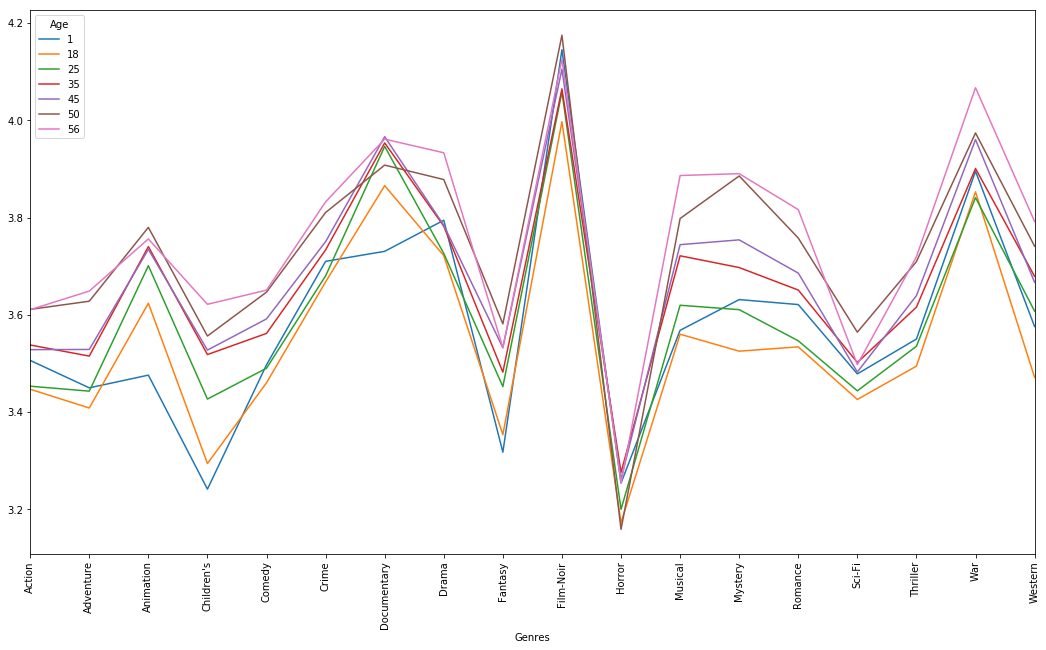

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
mean_rating_genres_gender.plot(xticks=arange(18),rot=90)
plt.savefig('mean_rate.png')
plt.show()

Result: After going through the result of our analysis we found that people in aged group (18-24 and 25-34) generally give ‘low’ ratings to almost each segment of movies and old people of age group belonging to 56+ generally give ‘high’ ratings and they are not difficult to please.

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [29]:
import sys

In [30]:
df = df_movies.merge(df_ratings.merge(df_users))

Plot a histogram of the ratings of all movies

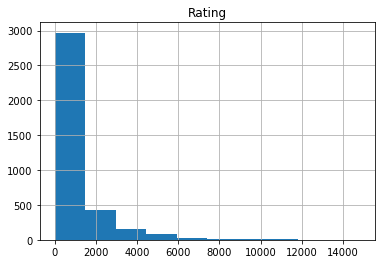

In [31]:
# Plot a histogram of the ratings of all movies
import matplotlib
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sum_ratings = df.pivot_table('Rating',index='Title',aggfunc='sum')
#print(sum_ratings.shape)
#sum_ratings[:5]

sum_ratings.hist()

py.savefig('sum_ratings.pdf')
plt.show()

 Plot a histogram of the number of ratings each movie recieved

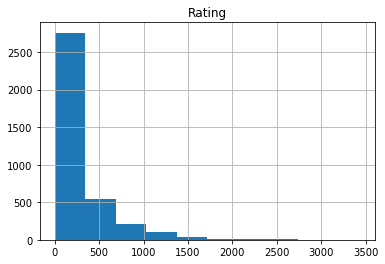

In [32]:
# Plot a histogram of the number of ratings each movie recieved

number_ratings = df.pivot_table('Rating', index = 'Title', aggfunc='count')
#print(number_ratings.shape)
#number_ratings[:5]

number_ratings.hist()

py.savefig('number_ratings.pdf')
plt.show()

Plot a histogram of the average rating for each movie

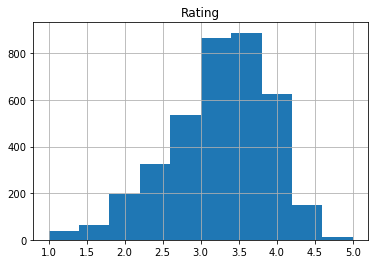

In [33]:
# Plot a histogram of the average rating for each movie
avg_ratings = df.pivot_table('Rating', index = 'Title', aggfunc='mean')
#print(avg_ratings.shape)
#avg_ratings[:5]

avg_ratings.hist()

py.savefig('avg_ratings.pdf')
plt.show()

Plot a histogram of the average rating for movies which are rated more than 100 times

/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


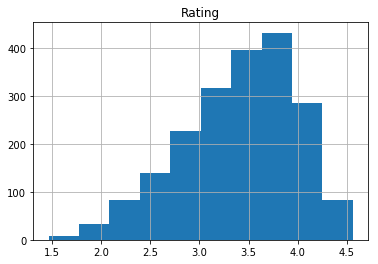

In [34]:
# Plot a histogram of the average rating for movies which are rated more than 100 times

ratings_size = df.groupby('Title').size()
active_titles = ratings_size.index[ratings_size > 100]
#print(active_titles.shape)

avg_ratings100 = avg_ratings.ix[active_titles]
#print(avg_ratings100.shape)
#avg_ratings100[:5]

avg_ratings100.hist()
py.savefig('avg_ratings100.pdf')
plt.show()

Q: What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
A: The tail of the histogram with all movie is wider than the tail of the histogram with movies rated more than 100 times.

Q: Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?

A: Rating from those who rated more than 100 times is preferred since the distribution of movie rating by them has less variance.

Conjecture 1: The distribution of movie rating may be different according to age group.

The distribution of average rating on each age group is illustrated in figure 2.5. The most fluctuated takes place in age group 1 (1-18 year-old); they are easier to give either 1 or 5 rating. It might be interpreted that when children under 18 like or dislike a movie, they are not tempting to give the highest or lowest score. For teenagers (age group 18: 18-25 year-old), giving movie rating is less fluctuated than children; they tend to consider more for giving 5-scored rating but still easily give 1-scored. The distribution from adults (age group 25, 35, 45 and 50: 25-55 year-old) is clearly more compacted with less spread in the tails; adults hardly give rating at either peak sides. However, movie rating by elderly people with age higher than 55 year-old seems to be more fluctuated; the distribution is likely as the distribution from children.

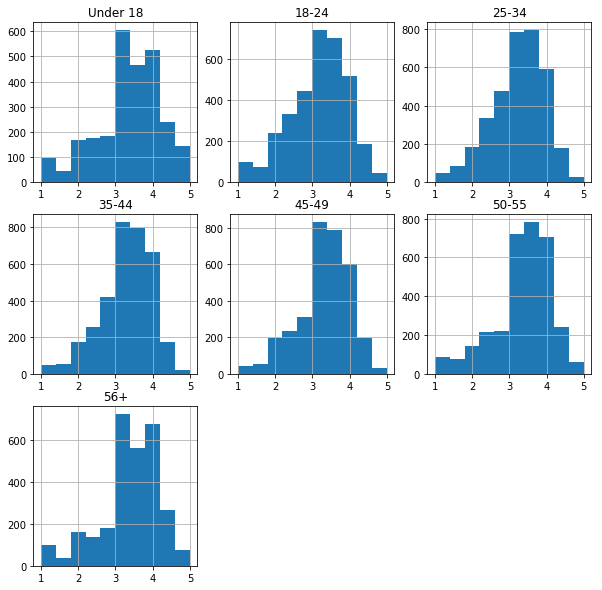

In [35]:
# Conjecture 1: The distribution of movie rating may be different according to age group.

age_avg_ratings = df.pivot_table('Rating', index = 'Title', columns='Age', aggfunc='mean')
#print(age_avg_ratings.shape)
#age_avg_ratings[:5]

fig = plt.figure(figsize=(10,10))

fig.add_subplot(3, 3, 1)
#plt.subplots_adjust(top=1)
age_avg_ratings[1].hist()
plt.title("Under 18")

fig.add_subplot(3, 3, 2)
#plt.subplots_adjust(top=1)
age_avg_ratings[18].hist()
plt.title("18-24")

fig.add_subplot(3, 3, 3)
#plt.subplots_adjust(top=1)
age_avg_ratings[25].hist()
plt.title("25-34")

fig.add_subplot(3, 3, 4)
#plt.subplots_adjust(top=1)
age_avg_ratings[35].hist()
plt.title("35-44")

fig.add_subplot(3, 3, 5)
#plt.subplots_adjust(top=1)
age_avg_ratings[45].hist()
plt.title("45-49")

fig.add_subplot(3, 3, 6)
#plt.subplots_adjust(top=1)
age_avg_ratings[50].hist()
plt.title("50-55")

fig.add_subplot(3, 3, 7)
#plt.subplots_adjust(top=1)
age_avg_ratings[56].hist()
plt.title("56+")

py.savefig('age_avg_ratings.pdf')
plt.show()

Conjecture 2: The distribution of movie rating may be different according to gender.
 
The difference of distribution of average rating between female and male is shown in figure 2.6. The average rating plot for female in the left hand side shows more left-skewed than the plot for male. It seems that women generally tend to give higher rating than men. However, women seem easier giving 1-score for the movies they do not like.

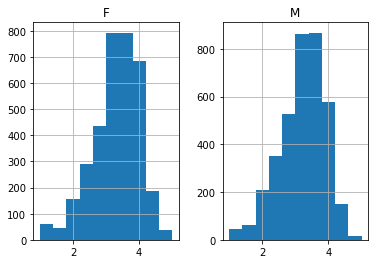

In [36]:
# Conjecture 2: The distribution of movie rating may be different according to gender.

gender_avg_ratings = df.pivot_table('Rating', index = 'Title', columns='Gender', aggfunc='mean')
#print(gender_avg_ratings.shape)
#gender_avg_ratings[:5]

gender_avg_ratings.hist()

py.savefig('gender_avg_ratings.pdf')
plt.show()

Conjecture 3: The distribution of movie rating may differ according to occupation.

The distributions of ratings by most occupations (figure 2.7) are in the same pattern with left-skewed and having the peak in between giving 3 to 4 of rating score. However, some occupations are easier to give extreme ratings such as farmer, K-12 student, lawyer,  retired or unemployed.

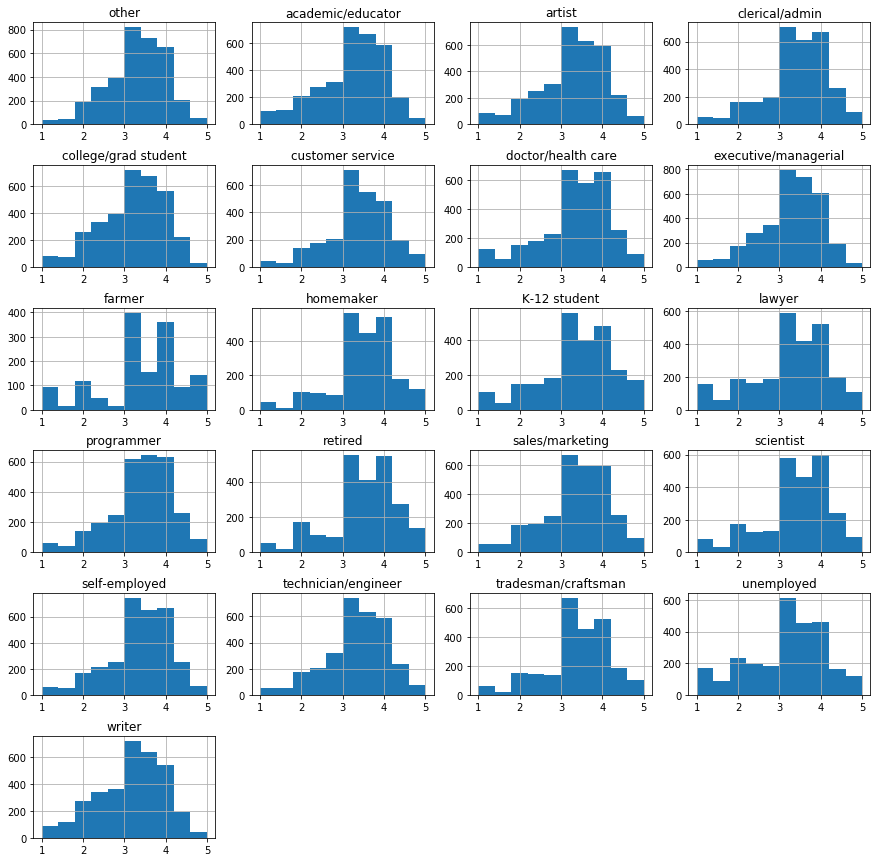

In [37]:
# Conjecture 3: The distribution of movie rating may differ according to occupation.

occ_avg_ratings = df.pivot_table('Rating', index = 'Title', columns='Occupation', aggfunc='mean')
#print(occ_avg_ratings.shape)
#occ_avg_ratings[:5]

fig = plt.figure(figsize=(15,15)) 
for i in range(0, 21) :
    fig.add_subplot(6, 4, i+1)
    plt.subplots_adjust(hspace=0.4)
    occ_avg_ratings[i].hist()
    if i==0 : plt.title("other")
    elif i==1 : plt.title("academic/educator")
    elif i==2 : plt.title("artist")
    elif i==3 : plt.title("clerical/admin")
    elif i==4 : plt.title("college/grad student")
    elif i==5 : plt.title("customer service")
    elif i==6 : plt.title("doctor/health care")
    elif i==7 : plt.title("executive/managerial")
    elif i==8 : plt.title("farmer")
    elif i==9 : plt.title("homemaker")
    elif i==10 : plt.title("K-12 student")
    elif i==11 : plt.title("lawyer")
    elif i==12 : plt.title("programmer")
    elif i==13 : plt.title("retired")
    elif i==14 : plt.title("sales/marketing")
    elif i==15 : plt.title("scientist")
    elif i==16 : plt.title("self-employed")
    elif i==17 : plt.title("technician/engineer")
    elif i==18 : plt.title("tradesman/craftsman")
    elif i==19 : plt.title("unemployed")
    else : plt.title("writer")        

py.savefig('occ_avg_ratings.pdf')
plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

mean_rating_title_gender=data.pivot_table('Rating',index='Title',columns='Gender',aggfunc='mean')
print(mean_rating_title_gender.shape)
mean_rating_title_gender.head()

(3706, 2)


Gender                                F         M
Title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

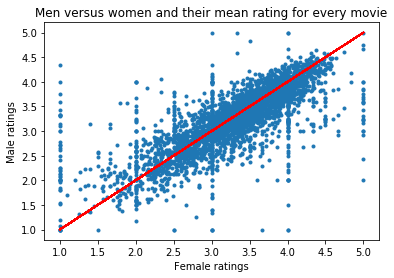

In [39]:
plt.scatter(mean_rating_title_gender['F'],mean_rating_title_gender['M'],marker='.',)
abline_values = [1 * i + 0 for i in mean_rating_title_gender['F']]
plt.plot(mean_rating_title_gender['F'], abline_values, 'r') # Plot abline y=x
plt.title('Men versus women and their mean rating for every movie') # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
plt.savefig('graph/scatter_mean_rating_gender.png')
plt.show()

 A scatter plot of men versus women and their mean rating for movies rated more than 200 times

In [40]:
# Find which movies have been rated more than 200 times
rating_title=data.pivot_table('Rating',index='Title',aggfunc={'Rating':'count'})
rating_title_gt200=rating_title[rating_title['Rating']>200]
print(rating_title_gt200.shape)
rating_title_gt200.head()

(1420, 1)


Rating
Title                                    
'burbs, The (1989)                    303
10 Things I Hate About You (1999)     700
101 Dalmatians (1961)                 565
101 Dalmatians (1996)                 364
12 Angry Men (1957)                   616

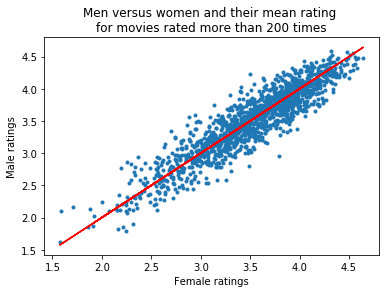

In [41]:
# Select indices of movies in previous dataframe, mean_rating_title_gender dataframe 
#in which the movies are rated > 2000 times (title is in rating_title_gt200)
index_gt200=[False]*len(mean_rating_title_gender.index)
for i in range(len(mean_rating_title_gender.index)):
    if mean_rating_title_gender.index[i] in rating_title_gt200.index:
        index_gt200[i]=True
        
plt.scatter(mean_rating_title_gender[index_gt200]['F'],mean_rating_title_gender[index_gt200]['M'],marker='.',)
abline_values = [1 * i + 0 for i in mean_rating_title_gender[index_gt200]['F']]
plt.plot(mean_rating_title_gender[index_gt200]['F'], abline_values, 'r') # Plot abline y=x
plt.title('Men versus women and their mean rating \nfor movies rated more than 200 times') # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
plt.savefig('graph/scatter_mean_rating_gender_rated>200.png')
plt.show()

 The correlation coefficent between the ratings of men and women

In [42]:
mean_rating_title_gender.corr()

Gender        F        M
Gender                  
F       1.00000  0.76319
M       0.76319  1.00000

In [43]:
 mean_rating_title_gender[index_gt200].corr()

Gender         F         M
Gender                    
F       1.000000  0.918361
M       0.918361  1.000000

Including every movie, the correlation coefficient between the mean ratings of men and women are strongly positive, around 0.76. After selecting only the movies rated more than 200 times, the correlation coefficient between the mean ratings of men and women increases significantly to 0.92. Both relationships indicate the positive correlation between the mean ratings of men and women. 

If we select only popular movies, the movies rated more than 200 times, the result of the scatter plot is better predictive. The scatter plot shows points scattering around the straight line y = x which indicating an even strongly positive correlation between the mean ratings of men and women. Both genders tends to have similar opinions about popular movies. 

*------------------------
**Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender**


Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.  



*------------------------

Conjecture 1: Men and women more similar when they are older

In [46]:
mean_rating_gender_age=data.pivot_table('Rating',index='Age',columns='Gender',aggfunc={'mean','var'})
mean_rating_gender_age

mean                 var          
Gender         F         M         F         M
Age                                           
1       3.616291  3.517461  1.421638  1.475733
18      3.453145  3.525476  1.386013  1.349477
25      3.606700  3.526780  1.223389  1.283204
35      3.659653  3.604434  1.159832  1.162368
45      3.663044  3.627942  1.149968  1.128665
50      3.797110  3.687098  1.068339  1.142844
56      3.915534  3.720327  1.074513  1.136960

 It is hard to tell the similarity of rating of men vs. women in different age groups from the above results. We then add genres into consideration. We separate age groups as following:

Children: under 18

Teenager: 18-24

Adult: 25-55

Elderly: 56+

Male vs female children and their mean rating for every movie

In [56]:
newdf.head()
mean_rating_gender_age_children=newdf[newdf.Age==1].pivot_table('Rating',index='Genres',columns='Gender',aggfunc={'mean','var'})
mean_rating_gender_age_children

mean                 var          
Gender              F         M         F         M
Genres                                             
Action       3.541325  3.497421  1.571875  1.418937
Adventure    3.543089  3.408598  1.420030  1.443757
Animation    3.725743  3.300903  1.170496  1.669478
Children's   3.528656  2.990489  1.319989  1.685031
Comedy       3.567358  3.460559  1.395047  1.449684
Crime        3.646575  3.727545  1.366506  1.254552
Documentary  3.920000  3.685714  1.826667  1.679121
Drama        3.798577  3.792602  1.205107  1.291003
Fantasy      3.445507  3.237754  1.412255  1.415894
Film-Noir    4.062500  4.172000  1.274525  0.801622
Horror       3.178125  3.285169  2.162275  1.632003
Musical      3.815177  3.325301  1.160652  1.626259
Mystery      3.658537  3.621662  1.564559  1.516380
Romance      3.757483  3.507645  1.211932  1.386224
Sci-Fi       3.451374  3.486696  1.651072  1.453862
Thriller     3.609712  3.532597  1.564910  1.429279
War          3.858289  3.906977  1.526781  1.301398
Western      3.604396  3.565574  1.241758  1.407205

In [57]:
mean_rating_gender_age_children['mean'].corr()

Gender         F         M
Gender                    
F       1.000000  0.682406
M       0.682406  1.000000

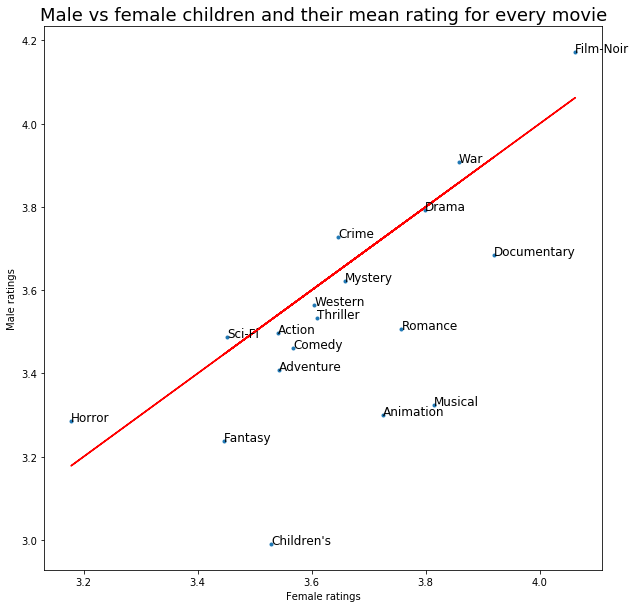

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(mean_rating_gender_age_children['mean']['F'],mean_rating_gender_age_children['mean']['M'],marker='.')
abline_values = [1 * i + 0 for i in mean_rating_gender_age_children['mean']['F']]
plt.plot(mean_rating_gender_age_children['mean']['F'], abline_values, 'r') # Plot abline y=x
plt.title('Male vs female children and their mean rating for every movie',fontsize=18) # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
for i, txt in enumerate(mean_rating_gender_age_children.index): # label points
    plt.annotate(txt, (mean_rating_gender_age_children['mean']['F'][i],mean_rating_gender_age_children['mean']['M'][i]),fontsize=12)
plt.savefig('graph/scatter_mean_rating_gender_age_children.png')
plt.show()

Male vs female teenagers and their mean rating for every movie

In [33]:
mean_rating_gender_age_teenager=newdf[newdf.Age==18].pivot_table('Rating',index='Genres',columns='Gender',aggfunc={'mean','var'})
mean_rating_gender_age_teenager

mean                 var          
Gender              F         M         F         M
Genres                                             
Action       3.331898  3.470897  1.460975  1.358443
Adventure    3.352118  3.423184  1.445575  1.382067
Animation    3.609199  3.630447  1.313874  1.261563
Children's   3.351548  3.268606  1.531891  1.475219
Comedy       3.423965  3.474137  1.395279  1.331320
Crime        3.544000  3.696591  1.379434  1.274613
Documentary  3.889362  3.859338  1.105004  1.261101
Drama        3.631157  3.756356  1.228643  1.194384
Fantasy      3.289038  3.374853  1.466474  1.402946
Film-Noir    3.837553  4.039313  1.124586  1.015901
Horror       3.086310  3.195408  1.522668  1.544361
Musical      3.667276  3.499585  1.305256  1.391638
Mystery      3.455351  3.546210  1.378674  1.322583
Romance      3.541125  3.530568  1.233823  1.219198
Sci-Fi       3.311891  3.449409  1.504135  1.416439
Thriller     3.377092  3.524609  1.408927  1.294298
War          3.726407  3.885352  1.349681  1.258901
Western      3.236581  3.521610  1.434521  1.407458

In [34]:
mean_rating_gender_age_teenager['mean'].corr()

Gender         F         M
Gender                    
F       1.000000  0.876386
M       0.876386  1.000000

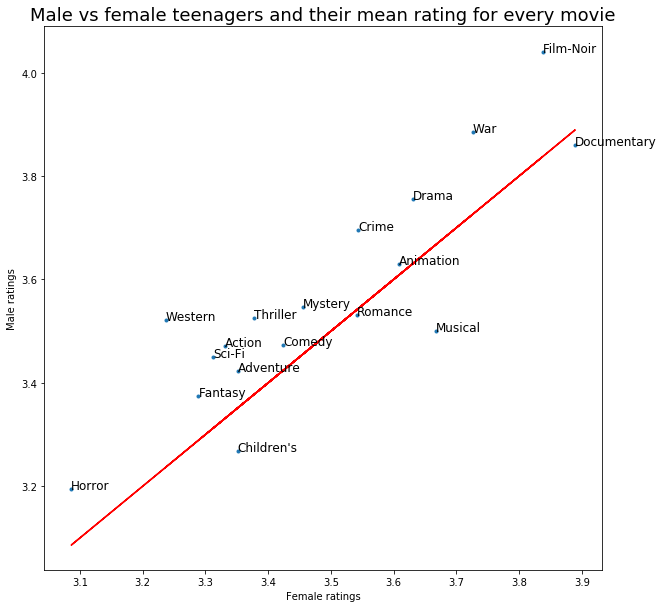

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(mean_rating_gender_age_teenager['mean']['F'],mean_rating_gender_age_teenager['mean']['M'],marker='.')
abline_values = [1 * i + 0 for i in mean_rating_gender_age_teenager['mean']['F']]
plt.plot(mean_rating_gender_age_teenager['mean']['F'], abline_values, 'r') # Plot abline y=x
plt.title('Male vs female teenagers and their mean rating for every movie',fontsize=18) # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
for i, txt in enumerate(mean_rating_gender_age_teenager.index): # label points
    plt.annotate(txt, (mean_rating_gender_age_teenager['mean']['F'][i],mean_rating_gender_age_teenager['mean']['M'][i]),fontsize=12)
plt.savefig('graph/scatter_mean_rating_gender_age_teenager.png')
plt.show()

Male vs Female adult and their mean rating for every movie

In [36]:
mean_rating_gender_age_adult=newdf[(18<newdf.Age) & (newdf.Age<56)].pivot_table('Rating',index='Genres',columns='Gender',aggfunc={'mean','var'})
mean_rating_gender_age_adult

mean                 var          
Gender              F         M         F         M
Genres                                             
Action       3.519969  3.492119  1.248168  1.260758
Adventure    3.544352  3.474918  1.212421  1.245532
Animation    3.794967  3.694144  1.069213  1.110643
Children's   3.654796  3.405424  1.123964  1.307545
Comedy       3.601292  3.509069  1.185393  1.235416
Crime        3.708660  3.714094  1.152866  1.119989
Documentary  3.957090  3.944111  1.038905  1.025755
Drama        3.776355  3.759888  1.063537  1.075054
Fantasy      3.583031  3.447825  1.176316  1.244615
Film-Noir    4.029025  4.097460  0.905637  0.821560
Horror       3.237270  3.220427  1.532716  1.462011
Musical      3.835578  3.615563  1.044007  1.204902
Mystery      3.707232  3.675337  1.146409  1.141776
Romance      3.686893  3.574298  1.086887  1.121795
Sci-Fi       3.481056  3.473326  1.339977  1.304736
Thriller     3.605610  3.577302  1.231430  1.183215
War          3.906749  3.884507  1.088993  1.114022
Western      3.591438  3.668471  1.196426  1.165541

In [37]:
mean_rating_gender_age_adult['mean'].corr()

Gender         F         M
Gender                    
F       1.000000  0.913469
M       0.913469  1.000000

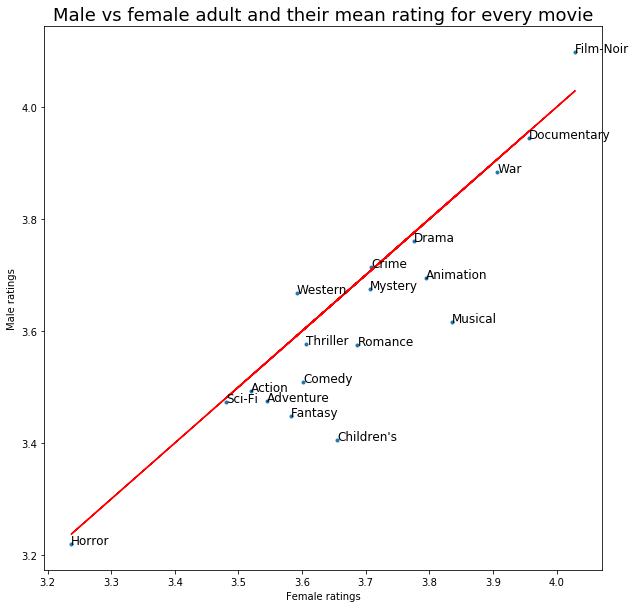

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(mean_rating_gender_age_adult['mean']['F'],mean_rating_gender_age_adult['mean']['M'],marker='.')
abline_values = [1 * i + 0 for i in mean_rating_gender_age_adult['mean']['F']]
plt.plot(mean_rating_gender_age_adult['mean']['F'], abline_values, 'r') # Plot abline y=x
plt.title('Male vs female adult and their mean rating for every movie',fontsize=18) # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
for i, txt in enumerate(mean_rating_gender_age_adult.index): # label points
    plt.annotate(txt, (mean_rating_gender_age_adult['mean']['F'][i],mean_rating_gender_age_adult['mean']['M'][i]),fontsize=12)
plt.savefig('graph/scatter_mean_rating_gender_age_adult.png')
plt.show()

Male vs Female elderly and their mean rating for every movie

In [39]:
mean_rating_gender_age_elder=newdf[newdf.Age==56].pivot_table('Rating',index='Genres',columns='Gender',aggfunc={'mean','var'})
mean_rating_gender_age_elder

mean                 var          
Gender              F         M         F         M
Genres                                             
Action       3.703175  3.593782  1.142507  1.165015
Adventure    3.773515  3.621739  1.128858  1.161968
Animation    3.900958  3.697403  1.049375  1.128648
Children's   3.834677  3.545977  1.018050  1.232524
Comedy       3.835796  3.589669  1.115266  1.231898
Crime        4.015491  3.788132  0.966168  1.070672
Documentary  3.902778  3.984043  1.235237  0.911745
Drama        4.034542  3.895779  0.905087  0.958013
Fantasy      3.743455  3.479524  1.230600  1.257016
Film-Noir    4.166667  4.112098  0.891980  0.832513
Horror       3.273846  3.250000  1.992689  1.579415
Musical      4.035058  3.817829  0.942797  1.054820
Mystery      4.053360  3.840341  0.936814  1.004675
Romance      3.951256  3.752119  1.014614  1.069801
Sci-Fi       3.503098  3.496685  1.465272  1.290658
Thriller     3.895666  3.678322  1.215927  1.110009
War          4.185786  4.035318  0.840072  0.968643
Western      3.772727  3.796047  1.059847  1.095463

In [40]:
 mean_rating_gender_age_elder['mean'].corr()

Gender         F         M
Gender                    
F       1.000000  0.882101
M       0.882101  1.000000

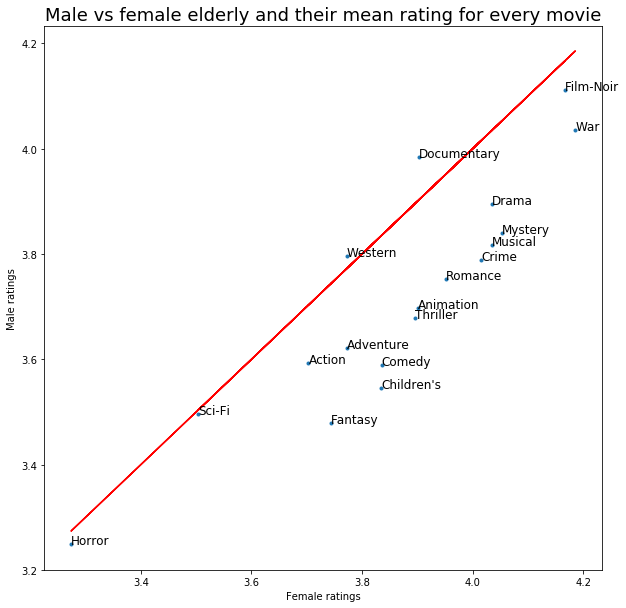

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(mean_rating_gender_age_elder['mean']['F'],mean_rating_gender_age_elder['mean']['M'],marker='.')
abline_values = [1 * i + 0 for i in mean_rating_gender_age_elder['mean']['F']]
plt.plot(mean_rating_gender_age_elder['mean']['F'], abline_values, 'r') # Plot abline y=x
plt.title('Male vs female elderly and their mean rating for every movie',fontsize=18) # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
for i, txt in enumerate(mean_rating_gender_age_elder.index): # label points
    plt.annotate(txt, (mean_rating_gender_age_elder['mean']['F'][i],mean_rating_gender_age_elder['mean']['M'][i]),fontsize=12)
plt.savefig('graph/scatter_mean_rating_gender_age_elder.png')
plt.show()

In [42]:
table=pd.DataFrame({'Age group':['Children','Teenager','Adult','Elderly'],
                    'Correlation of male vs female over genres':[0.6824,0.8764,0.9135,0.8821]})
table.set_index('Age group', inplace=True)
table

Correlation of male vs female over genres
Age group                                           
Children                                      0.6824
Teenager                                      0.8764
Adult                                         0.9135
Elderly                                       0.8821

From the correlation of male vs. female over the same movie genres across different age groups, men and women more similar when they are older (larger positive correlation).

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.


In [43]:
 mean_rating_occupation_gender=data.pivot_table('Rating',index='Occupation',columns='Gender',aggfunc={'mean','var'})
mean_rating_occupation_gender

mean                 var          
Gender             F         M         F         M
Occupation                                        
0           3.686842  3.487125  1.200448  1.281106
1           3.584606  3.571737  1.203362  1.240776
2           3.555888  3.581192  1.289160  1.302278
3           3.687679  3.630709  1.287492  1.133399
4           3.547252  3.533348  1.321038  1.370577
5           3.584891  3.527222  1.262161  1.188495
6           3.690834  3.641861  1.137447  1.293524
7           3.668559  3.585641  1.082530  1.192065
8           3.363208  3.498551  1.430526  1.146893
9           3.668467  3.498104  1.078217  0.905436
10          3.572390  3.515668  1.486166  1.504722
11          3.796822  3.590904  0.964955  1.366217
12          3.677102  3.650883  1.330726  1.151507
13          3.903894  3.750525  1.100285  1.065789
14          3.583702  3.629714  1.130188  1.213363
15          3.796093  3.665973  1.011425  1.161427
16          3.655868  3.585143  1.219469  1.141578
17          3.649366  3.609373  1.223456  1.147924
18          4.108696  3.509596  1.127228  1.124014
19          3.445724  3.404427  1.482511  1.486666
20          3.467402  3.507918  1.353435  1.323812

In [44]:
 mean_rating_occupation_gender['mean'].corr()

Gender         F         M
Gender                    
F       1.000000  0.437431
M       0.437431  1.000000

Not every occupation has similar ratings of men and women on movies. We wonder in which occupation that men and women are more similar.

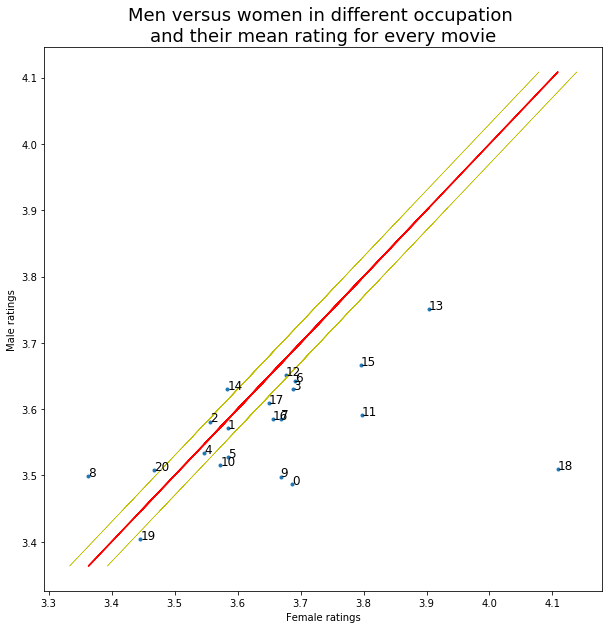

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(mean_rating_occupation_gender['mean']['F'],mean_rating_occupation_gender['mean']['M'],marker='.',)
abline_values = [1 * i + 0 for i in mean_rating_occupation_gender['mean']['F']]
plt.plot(mean_rating_occupation_gender['mean']['F'], abline_values, 'r') # Plot abline y=x
plt.plot(mean_rating_occupation_gender['mean']['F']-0.03, abline_values, 'y-',linewidth=0.5) # Plot abline y-0.03=x
plt.plot(mean_rating_occupation_gender['mean']['F']+0.03, abline_values, 'y-',linewidth=0.5) # Plot abline y+0.03=x
plt.title('Men versus women in different occupation \nand their mean rating for every movie',fontsize=18) # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
for i, txt in enumerate(mean_rating_occupation_gender.index): # label points
    plt.annotate(txt, (mean_rating_occupation_gender['mean']['F'][i],mean_rating_occupation_gender['mean']['M'][i]),fontsize=12)
plt.savefig('graph/scatter_mean_rating_occupation_gender.png')
plt.show()

 List of occupations:

*  0:  "other" or not specified
*  1:  "academic/educator"
*  2:  "artist"
*  3:  "clerical/admin"
*  4:  "college/grad student"
*  5:  "customer service"
*  6:  "doctor/health care"
*  7:  "executive/managerial"
*  8:  "farmer"
*  9:  "homemaker"
* 10:  "K-12 student"
* 11:  "lawyer"
* 12:  "programmer"
* 13:  "retired"
* 14:  "sales/marketing"
* 15:  "scientist"
* 16:  "self-employed"
* 17:  "technician/engineer"
* 18:  "tradesman/craftsman"
* 19:  "unemployed"
* 20:  "writer"

From the scatter plot of mean ratings, men and women are more similar when they work as academic/educator (1), artist (2), college/grad student (4), and programmer (12). Note that we set a threshold of residual to be +/- 0.03.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.


In [46]:
mean_rating_genres_gender=newdf.pivot_table('Rating',index='Genres',columns='Gender',aggfunc={'mean','var'})
mean_rating_genres_gender

mean                 var          
Gender              F         M         F         M
Genres                                             
Action       3.490252  3.491386  1.301485  1.281151
Adventure    3.512879  3.468125  1.273420  1.275861
Animation    3.744702  3.661335  1.146064  1.178676
Children's   3.572548  3.358961  1.258230  1.371642
Comedy       3.571938  3.503667  1.240458  1.260526
Crime        3.689332  3.713720  1.198255  1.151828
Documentary  3.946392  3.928811  1.063380  1.068556
Drama        3.765662  3.766589  1.093186  1.093847
Fantasy      3.513076  3.426603  1.271696  1.286220
Film-Noir    4.018087  4.092254  0.941241  0.847270
Horror       3.202870  3.217891  1.571948  1.485288
Musical      3.809108  3.596332  1.106141  1.248806
Mystery      3.686548  3.662009  1.195011  1.176226
Romance      3.673579  3.573262  1.121128  1.143246
Sci-Fi       3.450255  3.469952  1.388062  1.328829
Thriller     3.573360  3.569685  1.283187  1.208863
War          3.893138  3.893375  1.136425  1.134433
Western      3.551913  3.655120  1.241444  1.201446

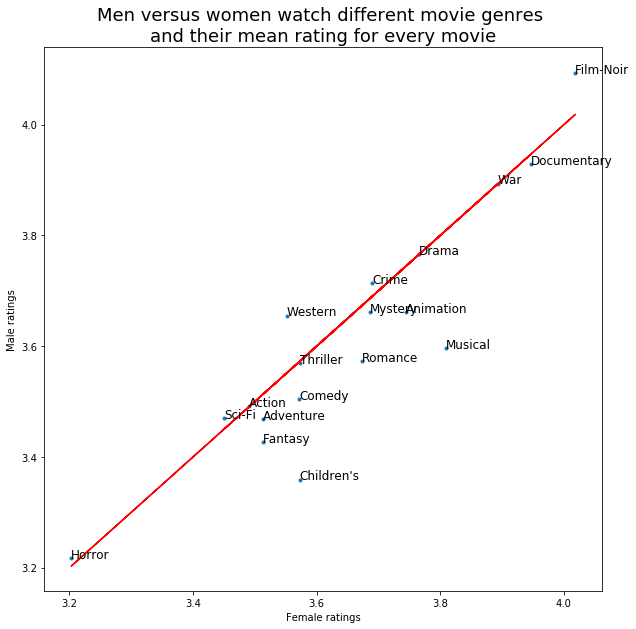

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(mean_rating_genres_gender['mean']['F'],mean_rating_genres_gender['mean']['M'],marker='.',)
abline_values = [1 * i + 0 for i in mean_rating_genres_gender['mean']['F']]
plt.plot(mean_rating_genres_gender['mean']['F'], abline_values, 'r') # Plot abline y=x
plt.title('Men versus women watch different movie genres \nand their mean rating for every movie',fontsize=18) # plot title
plt.ylabel('Male ratings') # y label
plt.xlabel('Female ratings') # x label
for i, txt in enumerate(mean_rating_genres_gender.index): # label points
    plt.annotate(txt, (mean_rating_genres_gender['mean']['F'][i],mean_rating_genres_gender['mean']['M'][i]),fontsize=12)
plt.savefig('graph/scatter_mean_rating_genres_gender.png')
plt.show()

Men and women more similar when they watch Action, Drama, War, and Triller.

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

In [61]:
#Business Questions
#Which movie to make/buy? (Seperating via Genre)
import datetime
import calendar
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
newdf['Time'] = pd.to_datetime(newdf['Timestamp'],unit='s')
newdf['Month'] = newdf.Time.dt.month
newdf['Year'] = newdf.Time.dt.year
newdf.head()

Genres  UserID  MovieID  Rating  \
0       Drama       1     1193       5   
1   Animation       1      661       3   
2  Children's       1      661       3   
3     Musical       1      661       3   
4     Musical       1      914       3   

                                    Title Gender  Age  Occupation Zip-code  \
0  One Flew Over the Cuckoo's Nest (1975)      F    1          10    48067   
1        James and the Giant Peach (1996)      F    1          10    48067   
2        James and the Giant Peach (1996)      F    1          10    48067   
3        James and the Giant Peach (1996)      F    1          10    48067   
4                     My Fair Lady (1964)      F    1          10    48067   

   Timestamp                Time  Month  Year  
0  978300760 2000-12-31 22:12:40     12  2000  
1  978302109 2000-12-31 22:35:09     12  2000  
2  978302109 2000-12-31 22:35:09     12  2000  
3  978302109 2000-12-31 22:35:09     12  2000  
4  978301968 2000-12-31 22:32:48     12  2000

In [62]:
newdf.groupby(["Year", "Month"]).size()

Year  Month
2000  4         24871
      5        144789
      6        114878
      7        191172
      8        386343
      9        109669
      10        88987
      11       616551
      12       238854
2001  1         35787
      2         16052
      3         11496
      4          9946
      5          9510
      6          9715
      7          9108
      8          9039
      9          5948
      10         4306
      11         5424
      12         6568
2002  1          6337
      2          4861
      3          4675
      4          5409
      5          3538
      6          3226
      7          3679
      8          4177
      9          2431
      10         1902
      11         3638
      12         2463
2003  1          3507
      2          2959
dtype: int64

In [63]:
newdf['YM'] = newdf.Year.astype(str) + "_" + newdf.Month.astype(str)
user_month_genre=newdf.pivot_table(values='UserID',index=['Genres','Month','Year'],aggfunc='count')
user_month_genre

UserID
Genres  Month Year        
Action  1     2001    3794
              2002     612
              2003     350
        2     2001    1727
              2002     472
              2003     321
        3     2001    1083
              2002     457
        4     2000    3239
              2001    1001
              2002     515
        5     2000   17790
              2001    1010
              2002     314
        6     2000   13373
              2001    1177
              2002     351
        7     2000   22341
              2001     988
              2002     394
        8     2000   51392
              2001    1007
              2002     492
        9     2000   13522
              2001     496
              2002     234
        10    2000   11021
              2001     538
              2002     167
        11    2000   75698
...                    ...
Western 2     2003      36
        3     2001      99
              2002      55
        4     2000     229
              2001      66
              2002      62
        5     2000    1407
              2001      56
              2002      34
        6     2000    1039
              2001      57
              2002      42
        7     2000    1945
              2001      67
              2002      22
        8     2000    4401
              2001      64
              2002      47
        9     2000     994
              2001      58
              2002      20
        10    2000     890
              2001      39
              2002      14
        11    2000    5864
              2001      35
              2002      24
        12    2000    2274
              2001      92
              2002      27

[630 rows x 1 columns]

In [64]:
user_month_genre_avg=user_month_genre.pivot_table('UserID',index=['Genres','Month'],aggfunc='mean')
user_month_genre_avg.head()

UserID
Genres Month             
Action 1      1585.333333
       2       840.000000
       3       770.000000
       4      1585.000000
       5      6371.333333

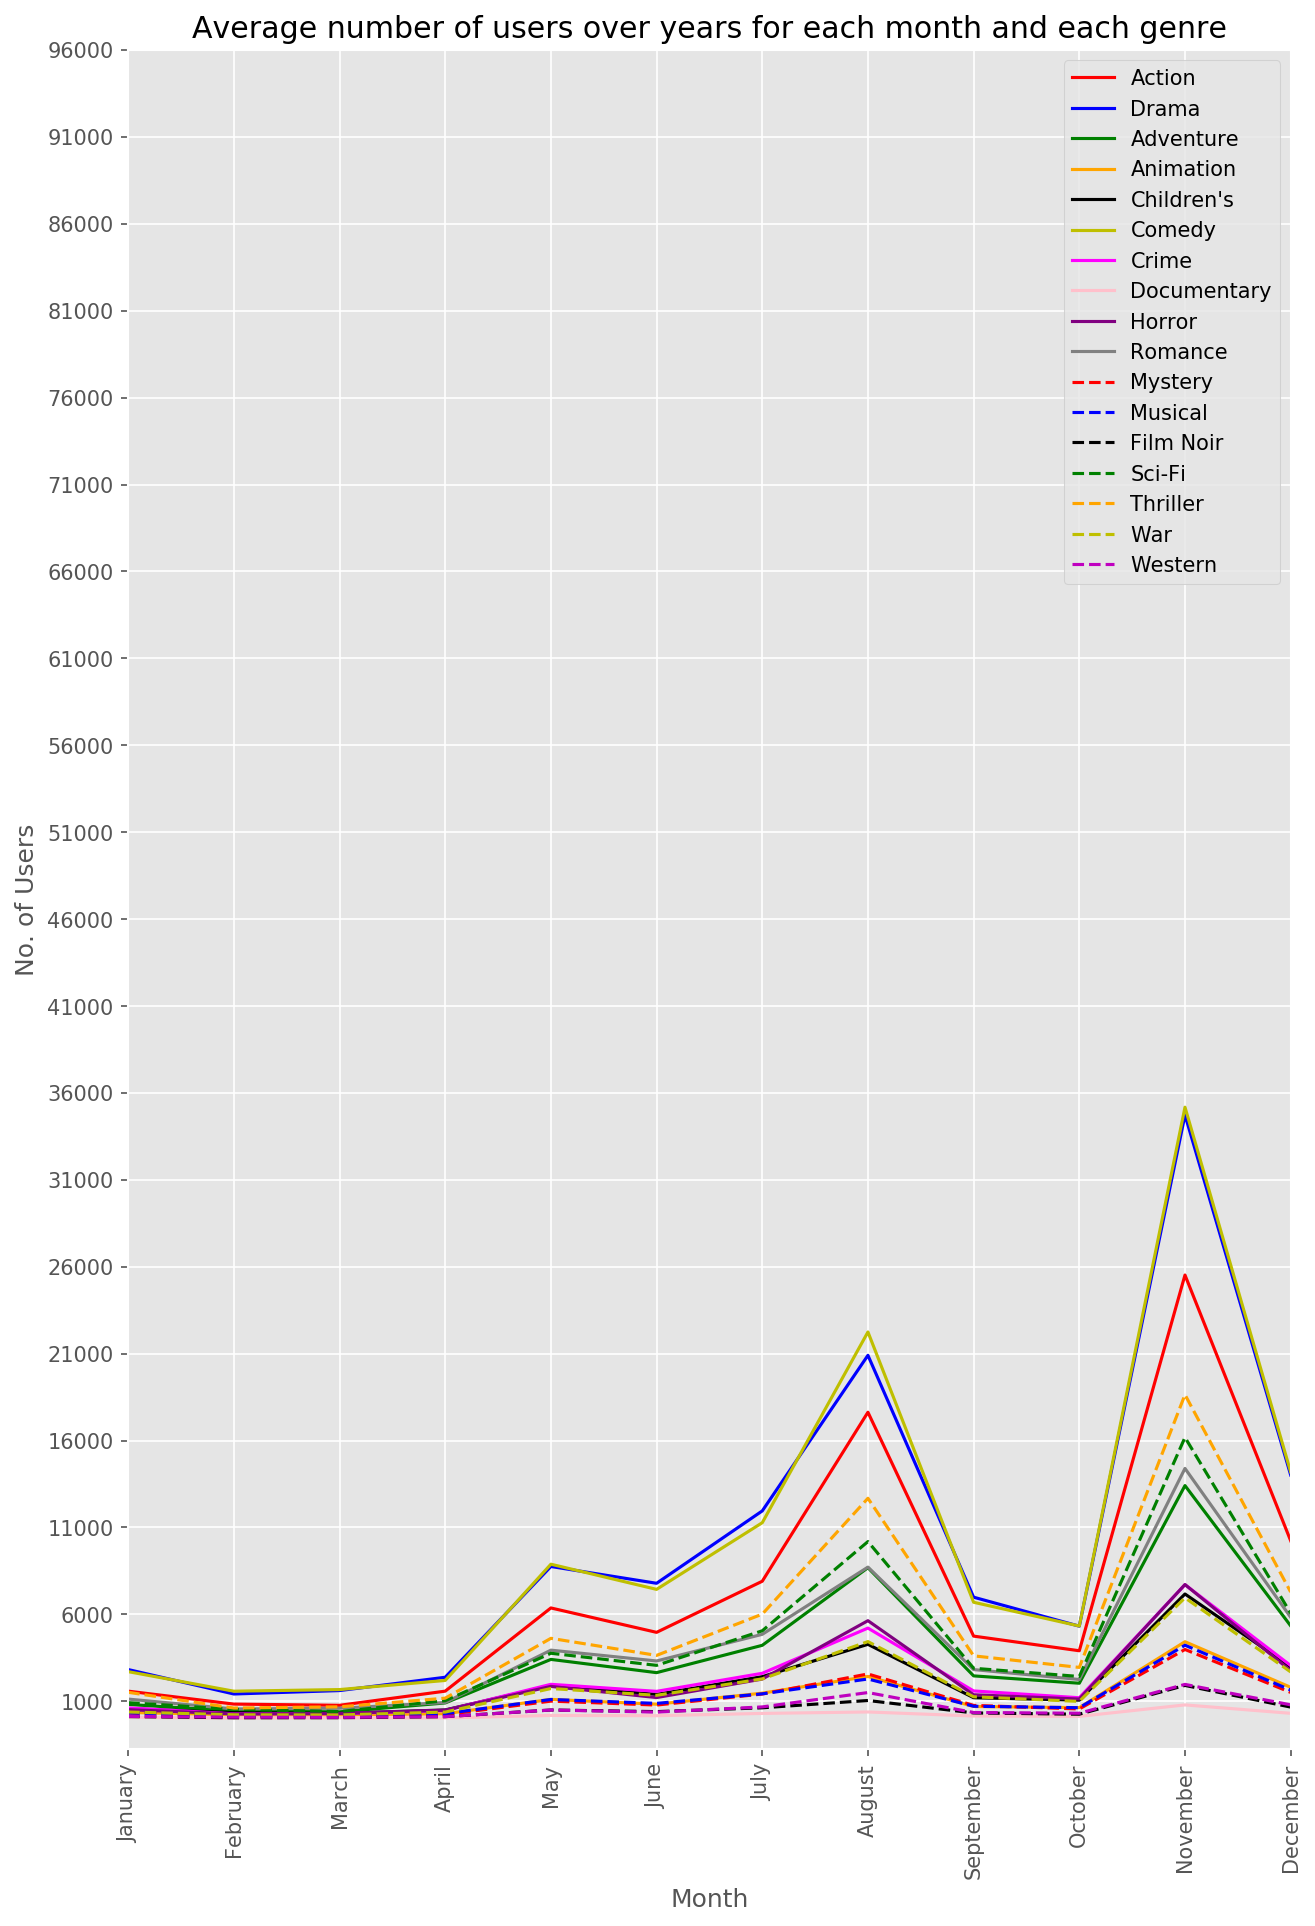

In [65]:
fig, ax = plt.subplots()
user_month_genre_avg.loc['Action'].plot.line(ax = ax,color='r')
user_month_genre_avg.loc['Drama'].plot.line(ax = ax,color='blue')
user_month_genre_avg.loc['Adventure'].plot.line(ax = ax,color='g')
user_month_genre_avg.loc['Animation'].plot.line(ax = ax,color='orange')
user_month_genre_avg.loc["Children's"].plot.line(ax = ax,color='black')
user_month_genre_avg.loc['Comedy'].plot.line(ax = ax,color='y')
user_month_genre_avg.loc['Crime'].plot.line(ax = ax,color='magenta')
user_month_genre_avg.loc['Documentary'].plot.line(ax = ax,color='pink')
user_month_genre_avg.loc['Horror'].plot.line(ax = ax,color='purple')
user_month_genre_avg.loc['Romance'].plot.line(ax = ax,color='grey')
user_month_genre_avg.loc['Mystery'].plot.line(ax = ax,color='r',linestyle='--')
user_month_genre_avg.loc['Musical'].plot.line(ax = ax,color='blue',linestyle='--')
user_month_genre_avg.loc['Film-Noir'].plot.line(ax = ax,color='black',linestyle='--')
user_month_genre_avg.loc['Sci-Fi'].plot.line(ax = ax,color='green',linestyle='--')
user_month_genre_avg.loc['Thriller'].plot.line(ax = ax,color='orange',linestyle='--')
user_month_genre_avg.loc['War'].plot.line(ax = ax,color='y',linestyle='--')
user_month_genre_avg.loc['Western'].plot.line(ax = ax,color='m',linestyle='--')
plt.xticks(range(1,13),[calendar.month_name[i] for i in range(1,13)],rotation = 90)
plt.yticks(range(1000,100000,5000))
fig.set_size_inches(10,15)
plt.ylabel("No. of Users")
L = plt.legend()
L.get_texts()[0].set_text('Action')
L.get_texts()[1].set_text('Drama')
L.get_texts()[2].set_text('Adventure')
L.get_texts()[3].set_text('Animation')
L.get_texts()[4].set_text("Children's")
L.get_texts()[5].set_text('Comedy')
L.get_texts()[6].set_text('Crime')
L.get_texts()[7].set_text('Documentary')
L.get_texts()[8].set_text('Horror')
L.get_texts()[9].set_text('Romance')
L.get_texts()[10].set_text('Mystery')
L.get_texts()[11].set_text('Musical')
L.get_texts()[12].set_text('Film Noir')
L.get_texts()[13].set_text('Sci-Fi')
L.get_texts()[14].set_text('Thriller')
L.get_texts()[15].set_text('War')
L.get_texts()[16].set_text('Western')
plt.title('Average number of users over years for each month and each genre')
fig.set_dpi(150)
plt.savefig('graph/user_month_genre_avg.png')
plt.show()

In [67]:
user_month_genre_y=newdf.pivot_table(values='UserID',index=['Year','Month'],aggfunc='count')
user_month_genre_y.head()

UserID
Year Month        
2000 4       24871
     5      144789
     6      114878
     7      191172
     8      386343

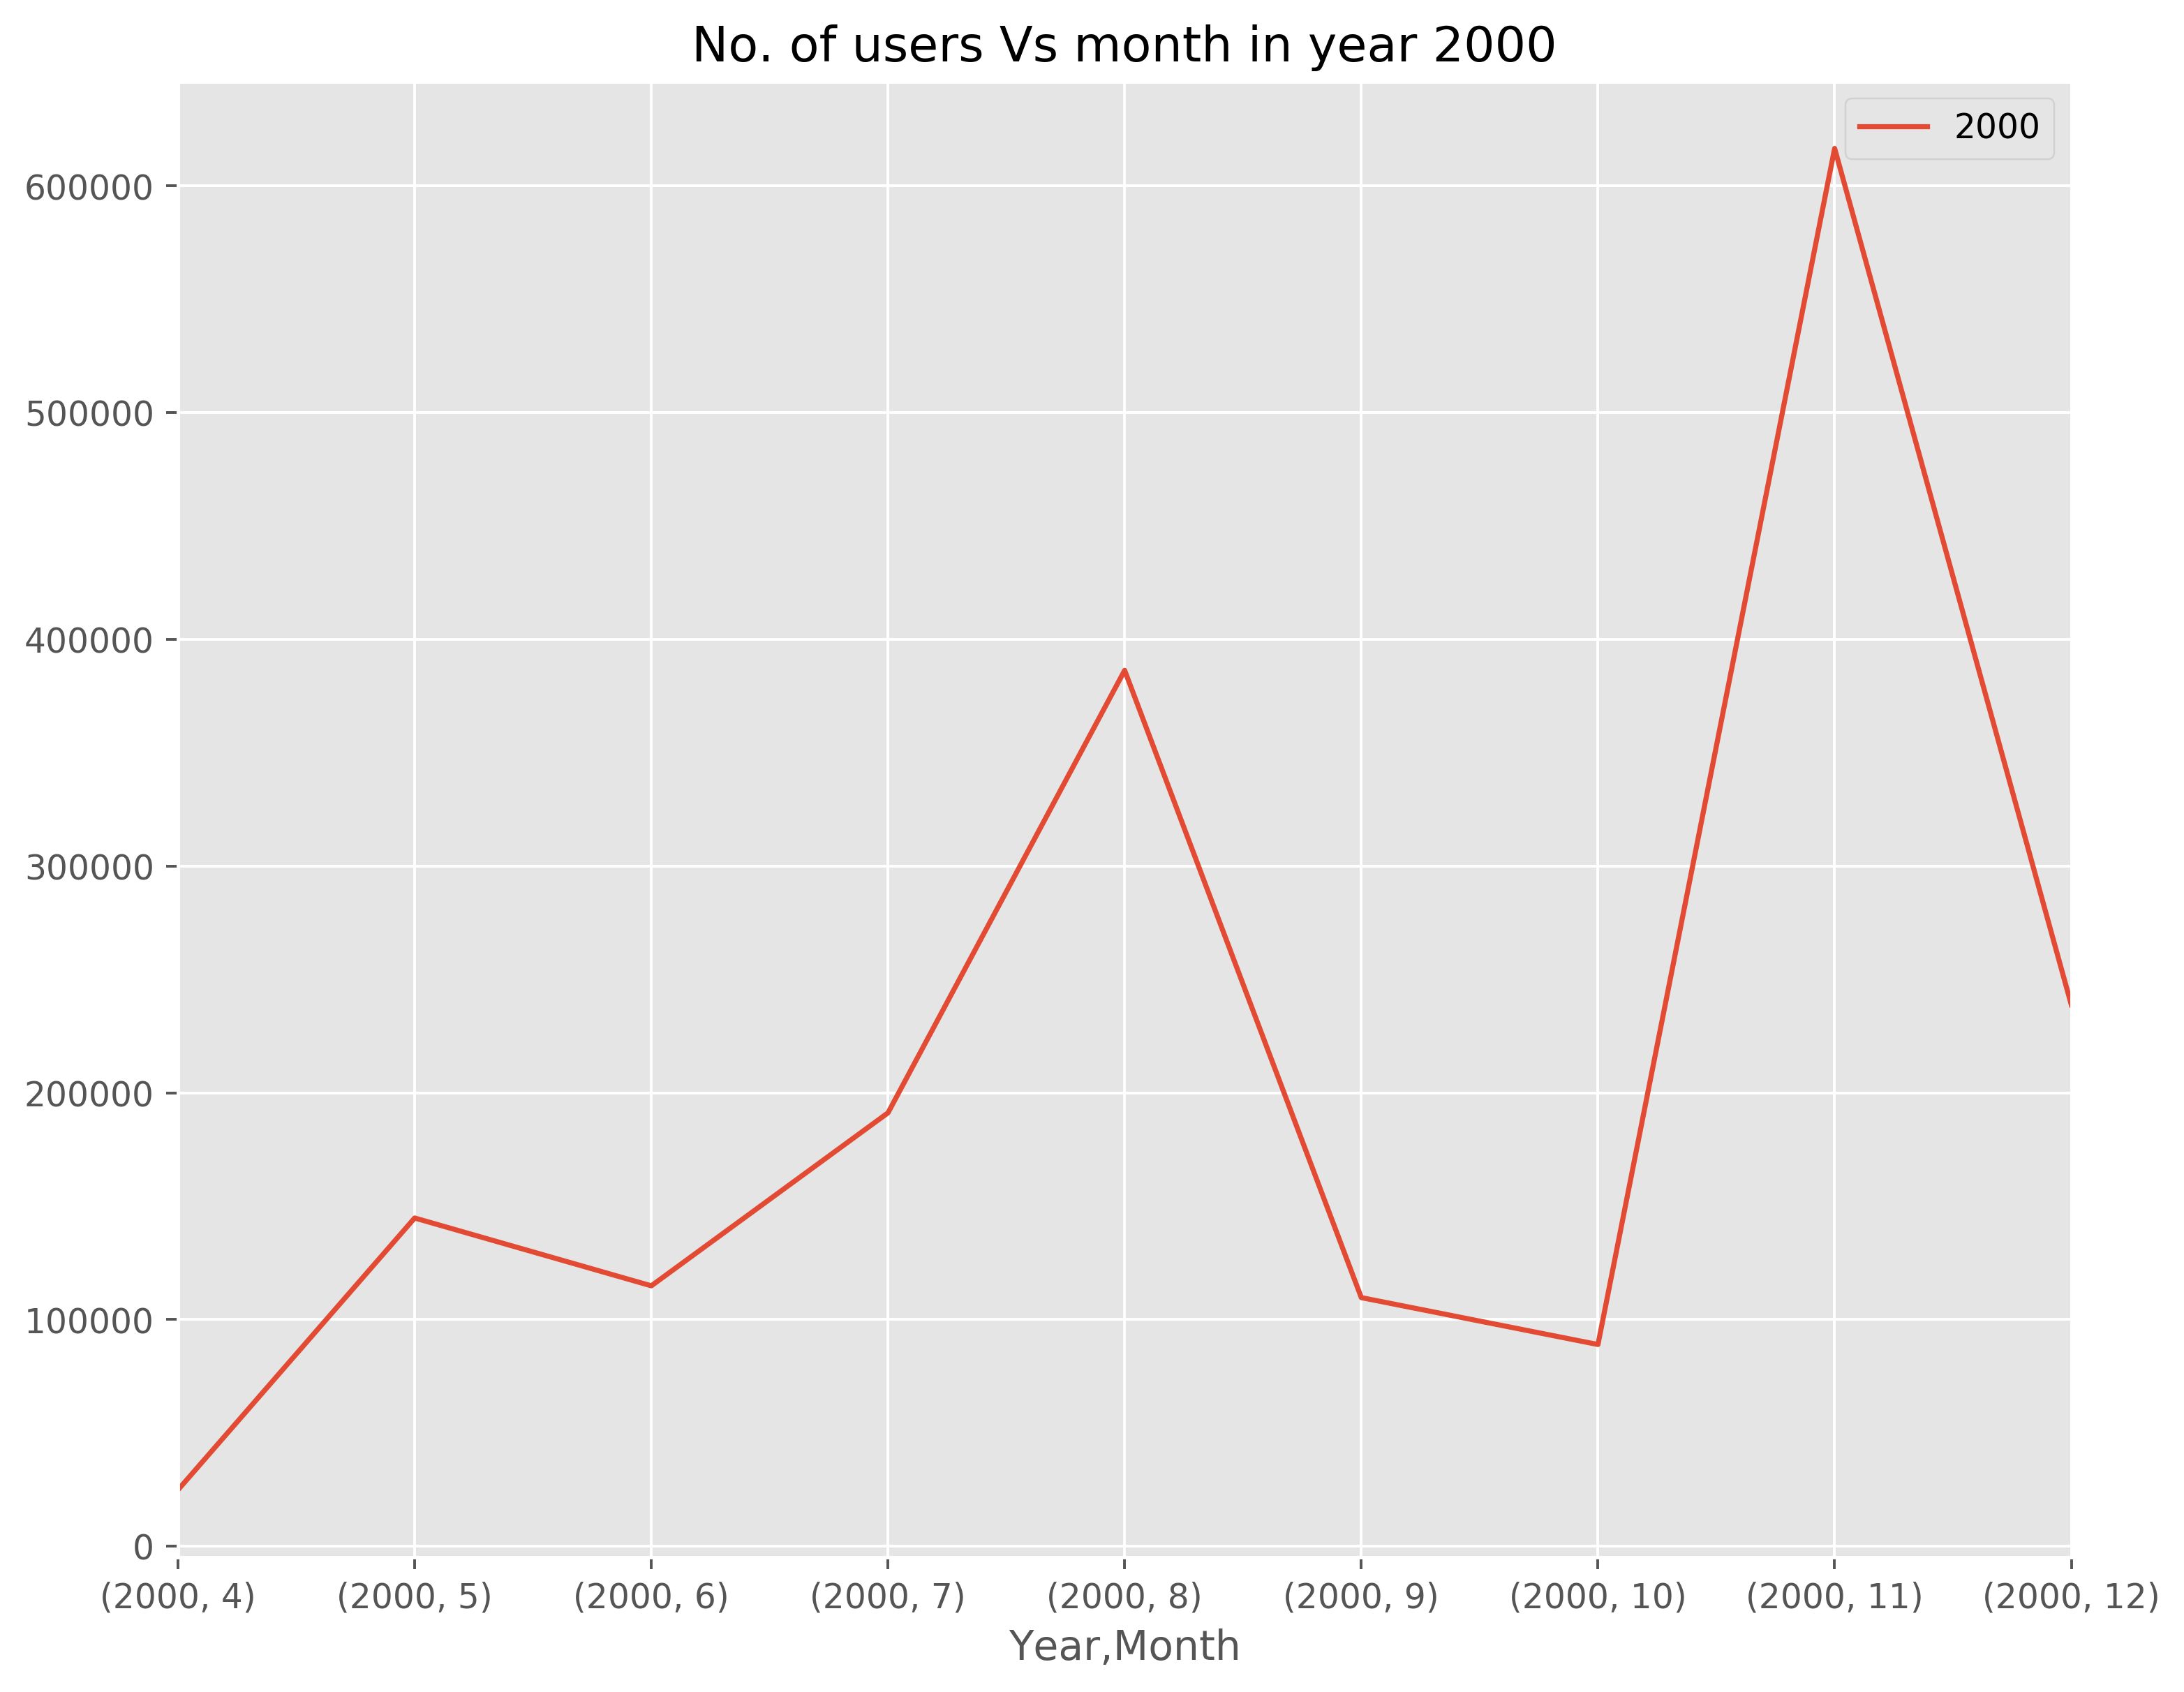

In [119]:
fig, ax = plt.subplots()
yeaR =user_month_genre_y.groupby('Year')
yeaR_2000 = yeaR.get_group(2000)
yeaR_2000= yeaR_2000.rename(columns={'UserID':'2000'})
fig.set_size_inches(10,8)
fig.set_dpi(350)
yeaR_2000.plot.line(ax=ax)
plt.title('No. of users Vs month in year 2000')
plt.savefig('graph/2000.png')
plt.show()

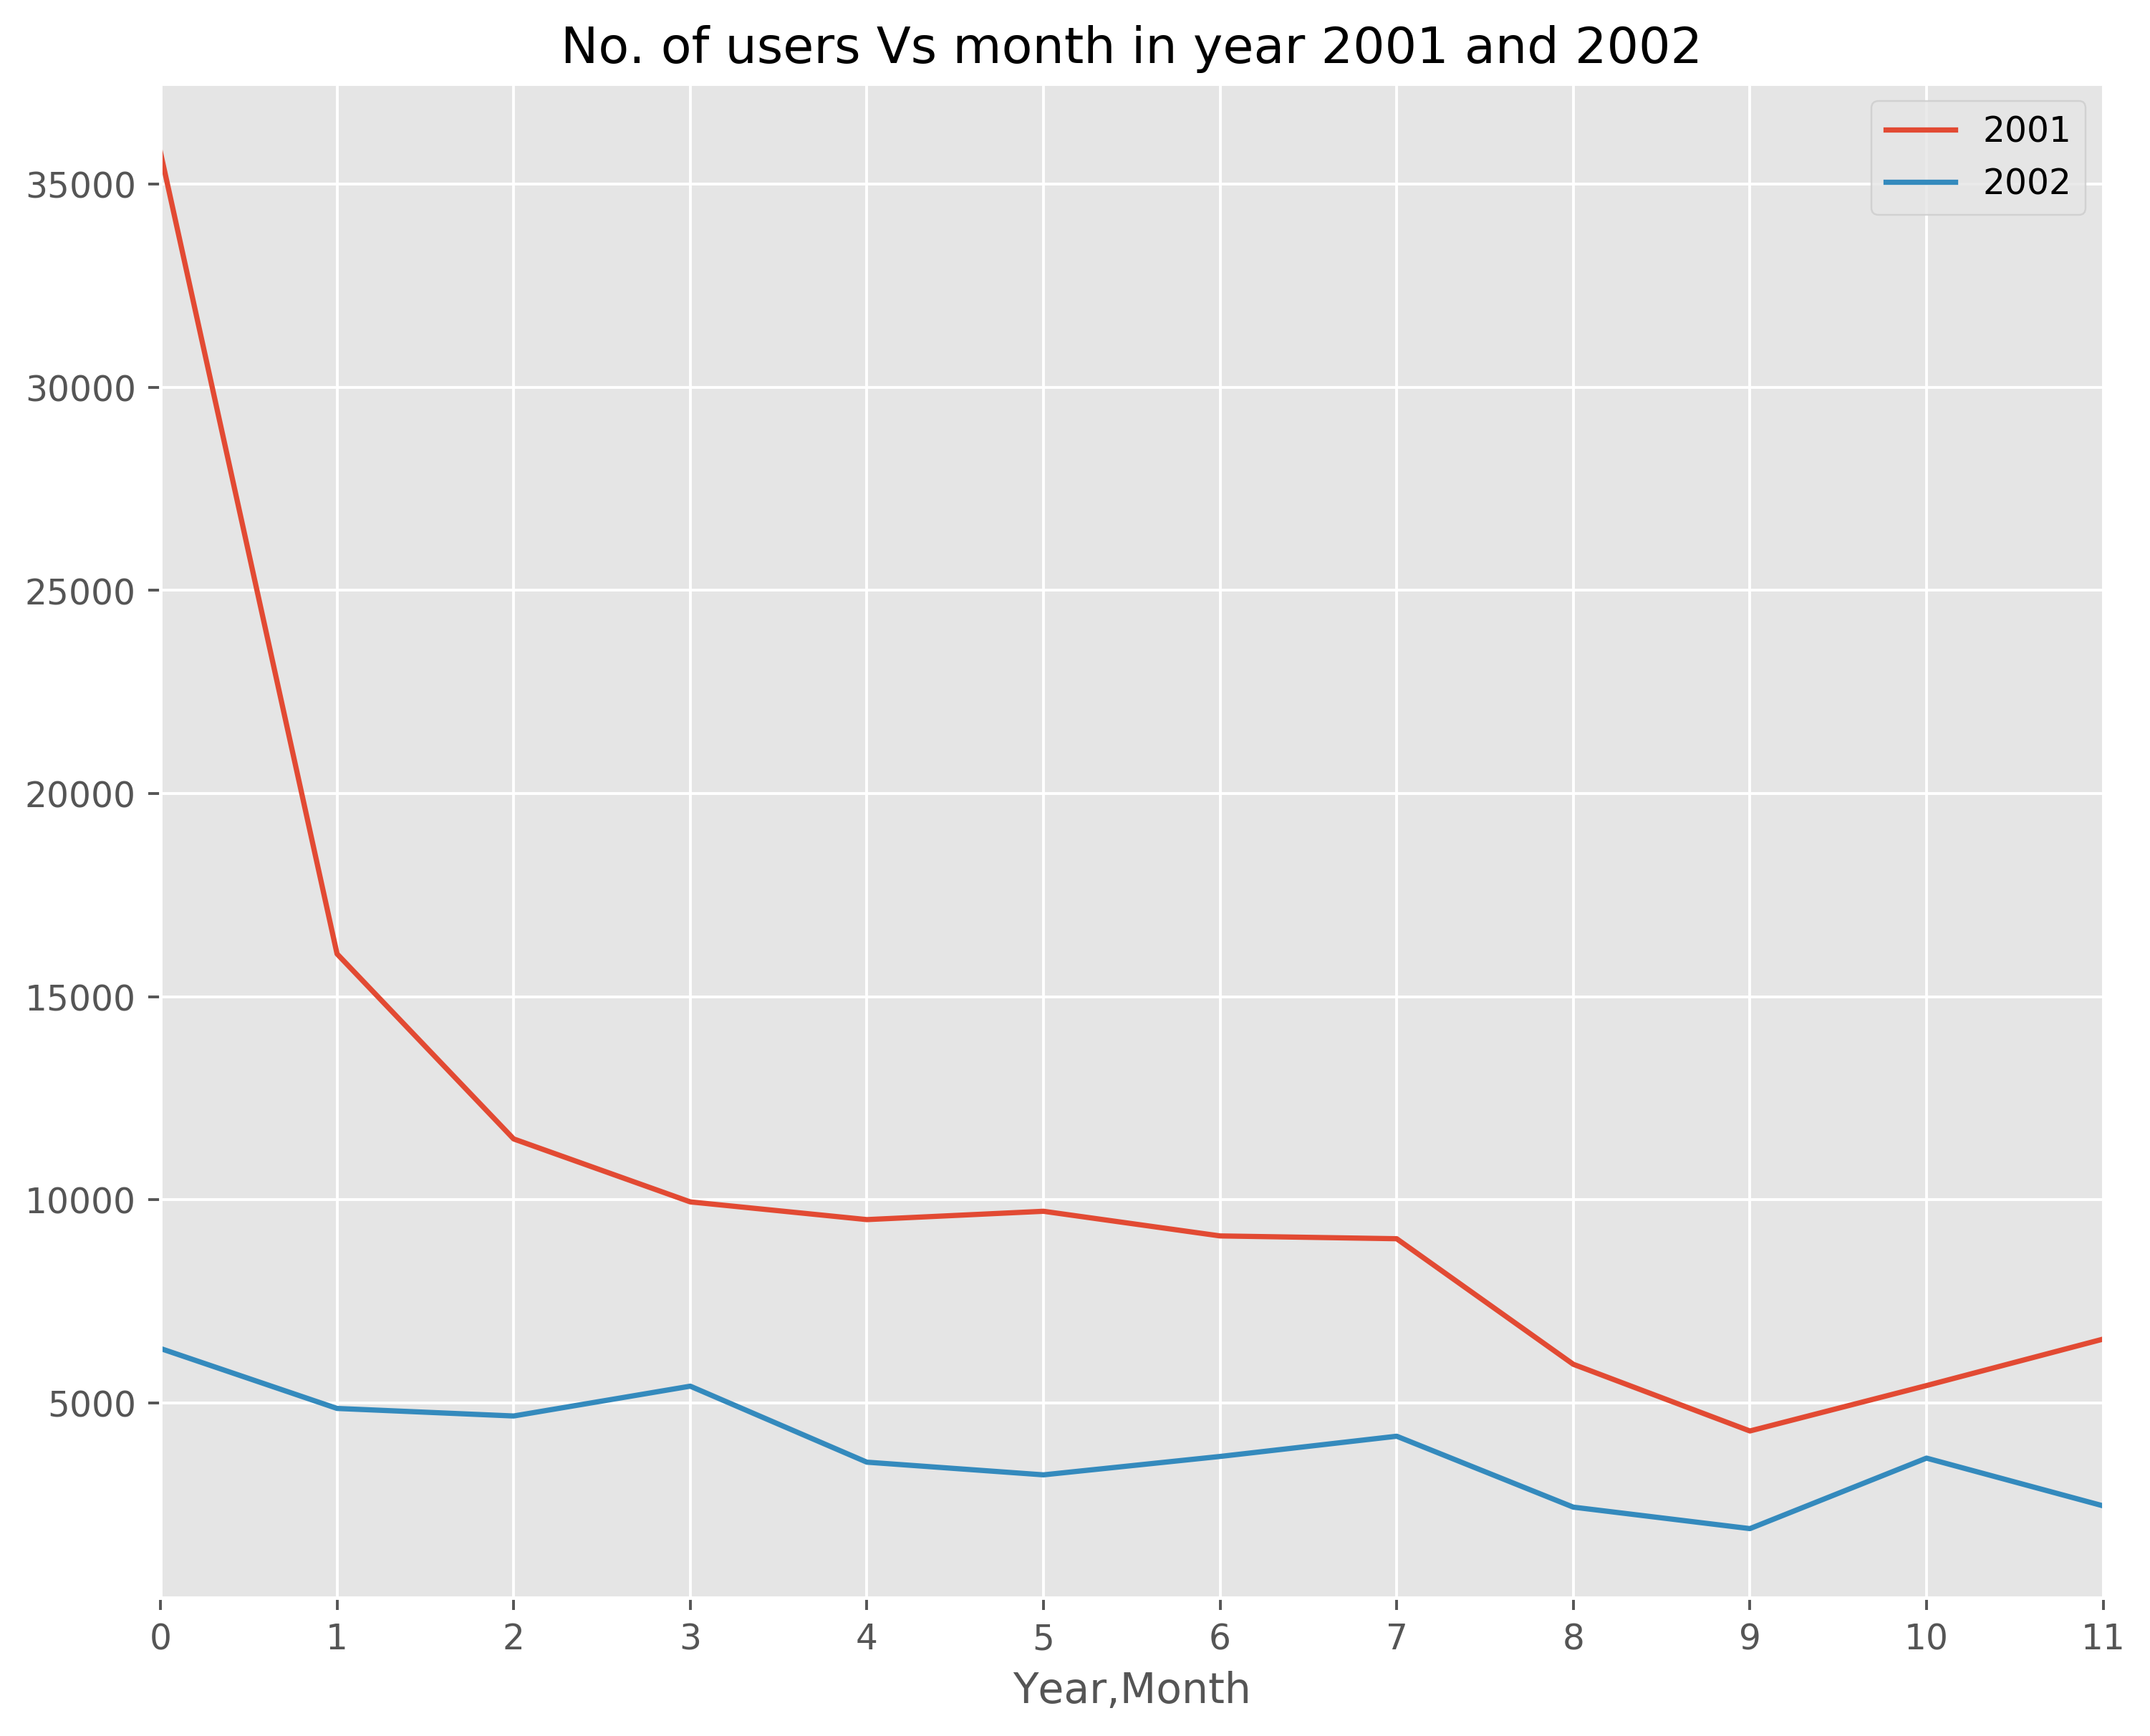

In [103]:
fig, ax = plt.subplots()
yeaR =user_month_genre_y.groupby('Year')
yeaR_2001 = yeaR.get_group(2001)
yeaR_2001=yeaR_2001.rename(columns={'UserID':'2001',})
yeaR_2002 = yeaR.get_group(2002)
yeaR_2002=yeaR_2002.rename(columns={'UserID':'2002',})
fig.set_size_inches(10,8)
fig.set_dpi(350)
yeaR_2001.plot.line(ax=ax)
yeaR_2002.plot.line(ax=ax)
plt.title('No. of users Vs month in year 2001 and 2002')
plt.savefig('graph/20012.png')
plt.xticks(arange(12),arange(12))
plt.show()

In [104]:
df  =  newdf[['Zip-code','Occupation','UserID','Genres']]
temp = pd.pivot_table(df,index=['Zip-code','Occupation','Genres'],values=['UserID'],aggfunc=len,fill_value=0)
temp.rename(columns={'UserID':'UsersRateFreq'},inplace=True)
temp[temp['UsersRateFreq'] >= 50]

UsersRateFreq
Zip-code Occupation Genres                   
00231    0          Romance                74
00606    8          Action                 51
                    Comedy                 78
                    Drama                  53
00681    10         Sci-Fi                 55
00918    3          Drama                 112
00961    4          Drama                 104
                    Romance                56
01002    4          Action                172
                    Adventure              72
                    Comedy                189
                    Crime                  53
                    Drama                 305
                    Horror                 52
                    Romance               119
                    Sci-Fi                 96
                    Thriller              135
                    War                    56
01003    4          Action                267
                    Adventure             139
                    Animation              56
                    Children's            128
                    Comedy                402
                    Drama                 204
                    Horror                 84
                    Romance                89
                    Sci-Fi                145
                    Thriller              130
01020    1          Action                 60
                    Drama                 105
...                                       ...
99163    4          Drama                  87
                    Fantasy                64
                    Horror                141
                    Musical                58
                    Sci-Fi                187
                    Thriller              133
99203    10         Action                 92
                    Comedy                118
99217    4          Action                 67
                    Comedy                 73
                    Drama                  50
99352    16         Action                 87
                    Comedy                120
                    Drama                 112
                    Romance                58
                    Thriller               61
99353    15         Action                164
                    Adventure             108
                    Comedy                205
                    Drama                 148
                    Romance               116
                    Sci-Fi                 94
                    Thriller               98
99504    3          Comedy                 87
                    Drama                 131
                    Thriller               54
99701    2          Comedy                154
                    Drama                 184
                    Romance                89
99709    17         Comedy                 87

[11461 rows x 1 columns]

In [105]:
 #grouping all zip-codes to respective states
import zipcode
def f(x):
    try:
        return zipcode.isequal(x).state
    except:
        return 'other'
df['Zip-code'] = df['Zip-code'].apply(lambda x :f(str(x)))
df['Zip-code'].unique()

/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array(['other', 'LA', 'MN', 'MA', 'CT', 'NY', 'CA', 'ME', 'FL', 'WA', 'PA',
       'KS', 'VA', 'TX', 'AR', 'GU', 'SD', 'AZ', 'NJ', 'OH', 'PR', 'OR',
       'TN', 'ID', 'IA', 'AK', 'WI', 'NH', 'UT', 'WV', 'CO', 'MS', 'IN',
       'NE', 'NV', 'GA', 'OK', 'HI', 'MO', 'DE', 'KY', 'RI', 'NM', 'WY',
       'MT', 'ND', 'AL', 'IL', 'SC', 'VT'], dtype=object)

In [106]:
df.to_hdf("data/1m/ml-1m/state_contraction.h5", key = "state_contraction", format='table', append = True)
del df

In [107]:
retrievedDataFrame = pd.HDFStore('data/1m/ml-1m/state_contraction.h5')
df = retrievedDataFrame["state_contraction"]

In [109]:
import us_state_abbr
a  = us_state_abbr.us_state_abbr
df['Zip-code'] = df['Zip-code'].apply(lambda x :a.get(x))
df['Zip-code'].unique()

array([None, 'Louisiana', 'Minnesota', 'Massachusetts', 'Connecticut',
       'New York', 'California', 'Maine', 'Florida', 'Washington',
       'Pennsylvania', 'Kansas', 'Virginia', 'Texas', 'Arkansas',
       'South Dakota', 'Arizona', 'New Jersey', 'Ohio', 'Oregon',
       'Tennessee', 'Idaho', 'Iowa', 'Alaska', 'Wisconsin',
       'New Hampshire', 'Utah', 'West Virginia', 'Colorado', 'Mississippi',
       'Indiana', 'Nebraska', 'Nevada', 'Georgia', 'Oklahoma', 'Hawaii',
       'Missouri', 'Delaware', 'Kentucky', 'Rhode Island', 'New Mexico',
       'Wyoming', 'Montana', 'North Dakota', 'Alabama', 'Illinois',
       'South Carolina', 'Vermont'], dtype=object)

In [110]:
temp_state = pd.pivot_table(df,index=['Zip-code','Occupation','Genres'],values=['UserID'],aggfunc=len,fill_value=0)
temp_state.rename(columns={'UserID':'UsersRateFreq'},inplace=True)
temp_state = temp_state[temp_state['UsersRateFreq'] >= 20]
temp_state

UsersRateFreq
Zip-code Occupation Genres                    
Alabama  0          Action                  36
                    Comedy                  86
                    Drama                   76
                    Romance                 24
                    Thriller                51
         1          Action                  69
                    Adventure               48
                    Comedy                 143
                    Documentary             20
                    Drama                   69
                    Romance                 52
                    Sci-Fi                  32
                    Thriller                54
                    War                     23
         2          Drama                   26
         5          Action                  26
         6          Action                 105
                    Adventure               65
                    Children's              33
                    Comedy                 133
                    Drama                  133
                    Romance                 60
                    Sci-Fi                  50
                    Thriller                53
                    War                     26
         7          Action                 346
                    Adventure              140
                    Children's              39
                    Comedy                 199
                    Crime                   57
...                                        ...
Wyoming  1          Sci-Fi                  31
                    Thriller                49
                    War                     21
         4          Action                  86
                    Adventure               57
                    Animation               24
                    Children's              43
                    Comedy                  63
                    Drama                   37
                    Sci-Fi                  87
                    Thriller                43
                    War                     24
         12         Action                 129
                    Adventure               48
                    Comedy                  51
                    Crime                   35
                    Drama                   53
                    Romance                 24
                    Sci-Fi                  45
                    Thriller                72
         17         Comedy                  28
         19         Action                 114
                    Adventure               42
                    Comedy                 186
                    Crime                   38
                    Drama                   82
                    Romance                 32
                    Sci-Fi                  41
                    Thriller                50
                    War                     33

[7013 rows x 1 columns]

Mean:  UsersRateFreq    227.256096
dtype: float64
STD :  UsersRateFreq    484.258879
dtype: float64


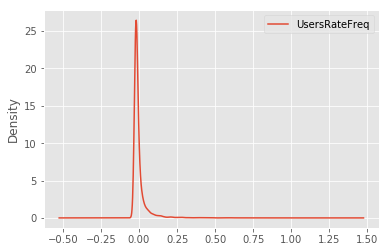

In [112]:
print('Mean: ',temp_state.mean())
print('STD : ',temp_state.std())
df_norm = (temp_state - temp_state.mean()) / (temp_state.max() - temp_state.min())
df_norm.plot.density()
plt.show()

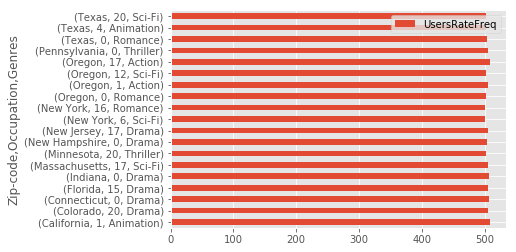

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
temp_state[(temp_state['UsersRateFreq']>500) & (temp_state['UsersRateFreq']<510)].plot.barh()
plt.show()

In [113]:
 #temp_state.apply(lambda g: g.sort_index( ascending=False).head(3))
temp_state.sort_index(by='UsersRateFreq',inplace=True,ascending=False)
t = temp_state.groupby(level=0)['UsersRateFreq'].head(1)
t

/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


Zip-code        Occupation  Genres
California      4           Comedy    8354
New York        7           Drama     4221
Massachusetts   4           Comedy    3352
Ohio            0           Comedy    2980
Texas           4           Comedy    2816
Minnesota       7           Drama     2650
Washington      0           Drama     1949
Florida         0           Action    1532
New Jersey      7           Drama     1495
Colorado        4           Comedy    1476
Pennsylvania    4           Drama     1445
Oregon          0           Comedy    1257
Kansas          0           Drama     1198
Connecticut     1           Drama     1029
Arizona         4           Comedy     994
Oklahoma        0           Comedy     993
Maine           1           Drama      842
Tennessee       1           Drama      810
Missouri        4           Comedy     725
Iowa            1           Drama      621
Delaware        7           Comedy     617
New Mexico      20          Drama      527
Indiana         0  

In [114]:
occ = {
0:  "other",
1:  "academic/educator",
2:  "artist",
3:  "clerical/admin",
4:  "college/grad student",
5:  "customer service",
6:  "doctor/health care",
7:  "executive/managerial",
8:  "farmer",
9:  "homemaker",
10:  "K-12 student",
11:  "lawyer",
12:  "programmer",
13:  "retired",
14:  "sales/marketing",
15:  "scientist",
16:  "self-employed",
17:  "technician/engineer",
18:  "tradesman/craftsman",
19:  "unemployed",
20:  "writer",
}
occ.get(2)

'artist'

In [117]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import geocoder
import math

import matplotlib.pyplot as plt
%matplotlib inline

cities = t.index.get_level_values(0)
genres = t.index.get_level_values(2)
occupation = t.index.get_level_values(1)
scale = 5
plt.figure(figsize=(120,60))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('data/st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 55,
        }
c =0

geolocator = Nominatim()
for (city) in cities:
    loc = geolocator.geocode(city)
    #loc = geocoder.location(city)
    a = t.xs((city)).as_matrix()
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='aquamarine',markersize=int(math.sqrt(int(a[0])))*scale)
    plt.text(x,y,str(city+'\n'+genres[c]+'\n'+str(occ.get(occupation[c]))),fontdict=font)
    c= c+1 
plt.savefig("worldmap41.png")    

/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team 5

#### where 5 is your team number.
        
** Note: Each team just needs to submits one submission **